In [1]:
# configuring path
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime

In [3]:
%cd /content/drive/MyDrive/collab/
!pwd

/content/drive/MyDrive/collab
/content/drive/MyDrive/collab


In [4]:
df = pd.read_csv('data_t3.csv')
print(df.head(10))

   day_of_week  ...  Total_Pedestrian_Count_per_day
0            4  ...                          471563
1            5  ...                          389048
2            6  ...                          291761
3            7  ...                          382364
4            1  ...                          487220
5            2  ...                          485340
6            3  ...                          427142
7            4  ...                          474146
8            5  ...                          493430
9            6  ...                          425481

[10 rows x 11 columns]


In [5]:
COLUMN_SEP = '|'
date_cols = ['day_of_week','monthly_index','year','day_of_year']
target_col = df.columns.tolist()[-1]
feat_cols = list(set(df.columns.tolist()[:-1])-set(date_cols))
non_date_cols = set(df.columns)-set(date_cols)

In [6]:
print('Features: {}'.format(COLUMN_SEP.join(feat_cols)))
print('Num features: {}'.format(len(feat_cols)))

Features: Daily global solar exposure (MJ/m*m)|Maximum temperature (Degree C)|Covid Restrictions|Rainfall amount (millimetres)|Minimum temperature (Degree C)|Public_Holiday
Num features: 6


In [7]:
# Data types for the columns
print(df.dtypes)

day_of_week                               int64
monthly_index                             int64
year                                      int64
day_of_year                               int64
Covid Restrictions                       object
Public_Holiday                           object
Rainfall amount (millimetres)           float64
Minimum temperature (Degree C)          float64
Maximum temperature (Degree C)          float64
Daily global solar exposure (MJ/m*m)    float64
Total_Pedestrian_Count_per_day            int64
dtype: object


In [8]:
# number of unique values for each column
df[non_date_cols].nunique(axis=0)

Total_Pedestrian_Count_per_day          2128
Daily global solar exposure (MJ/m*m)     316
Maximum temperature (Degree C)           283
Covid Restrictions                         2
Rainfall amount (millimetres)            129
Minimum temperature (Degree C)           211
Public_Holiday                             2
dtype: int64

In [9]:
df[non_date_cols].describe()

,Total_Pedestrian_Count_per_day,Daily global solar exposure (MJ/m*m),Maximum temperature (Degree C),Rainfall amount (millimetres),Minimum temperature (Degree C)
count,2.132000e+03,2131.000000,2132.000000,2124.000000,2132.000000
mean,6.007945e+05,14.770718,20.392167,1.742938,11.572186
std,1.901627e+05,7.926191,6.261845,4.709667,4.293391
min,6.169100e+04,0.700000,9.000000,0.000000,0.600000
25%,5.305288e+05,8.200000,15.600000,0.000000,8.500000
50%,6.269880e+05,12.800000,19.100000,0.000000,11.300000
75%,7.229965e+05,20.700000,23.900000,1.200000,14.600000
max,1.149216e+06,33.300000,43.500000,57.200000,28.000000


In [10]:
# sub_feat_coll_cnt = 2
# for i in range(0, len(non_date_cols), sub_feat_coll_cnt):
#     sub_feat_list = non_date_cols[i:i + sub_feat_coll_cnt]
#     print(df[sub_feat_list].describe())
#     print('-----------------__')

In [11]:
# columns that contains missing value
columns_with_nan_values = df.columns[df.isna().any()].tolist()      
print('Columns with missing values: {}'.format(COLUMN_SEP.join(columns_with_nan_values)))
# count of number of missing values per feature
print(df.isnull().sum())

Columns with missing values: Rainfall amount (millimetres)|Daily global solar exposure (MJ/m*m)
day_of_week                             0
monthly_index                           0
year                                    0
day_of_year                             0
Covid Restrictions                      0
Public_Holiday                          0
Rainfall amount (millimetres)           8
Minimum temperature (Degree C)          0
Maximum temperature (Degree C)          0
Daily global solar exposure (MJ/m*m)    1
Total_Pedestrian_Count_per_day          0
dtype: int64


In [12]:
# update the missing values using up and down lookup mean 
def perform_imputation(df, col_name):
  def update_missing_value(row_idx):
    nonlocal df, col_name
    row_lookup = 4      # lookup above and below the missing value
    missing_val_lookup_mean = df.iloc[row_idx-row_lookup:row_idx+row_lookup].fillna(value=0)[col_name].tolist()
    return np.mean(missing_val_lookup_mean)
  missing_col_rows = df[df[col_name].isnull()]
  for missing_idx in missing_col_rows.index:
    df.at[missing_idx, col_name] = update_missing_value(missing_idx)
  return df


for missing_val_col in columns_with_nan_values:
  df = perform_imputation(df, missing_val_col)

In [13]:
# columns that contains missing value
columns_with_nan_values = df.columns[df.isna().any()].tolist()      
print('Columns with missing values: {}'.format(COLUMN_SEP.join(columns_with_nan_values)))
print(df.isnull().sum())

Columns with missing values: 
day_of_week                             0
monthly_index                           0
year                                    0
day_of_year                             0
Covid Restrictions                      0
Public_Holiday                          0
Rainfall amount (millimetres)           0
Minimum temperature (Degree C)          0
Maximum temperature (Degree C)          0
Daily global solar exposure (MJ/m*m)    0
Total_Pedestrian_Count_per_day          0
dtype: int64


In [21]:
# calculate correlation matrix
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
corr = df[non_date_cols].corr()# plot the heatmap
print(corr)

                                      Total_Pedestrian_Count_per_day  \
Total_Pedestrian_Count_per_day        1.000000                         
Daily global solar exposure (MJ/m*m)  0.220420                         
Maximum temperature (Degree C)        0.188956                         
Rainfall amount (millimetres)        -0.073529                         
Minimum temperature (Degree C)        0.150087                         

                                      Daily global solar exposure (MJ/m*m)  \
Total_Pedestrian_Count_per_day        0.220420                               
Daily global solar exposure (MJ/m*m)  1.000000                               
Maximum temperature (Degree C)        0.594741                               
Rainfall amount (millimetres)        -0.149814                               
Minimum temperature (Degree C)        0.371755                               

                                      Maximum temperature (Degree C)  \
Total_Pedestrian_Count_per

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


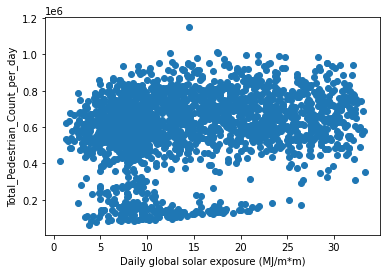

--------------------------------------------------------------------------------------------------------------


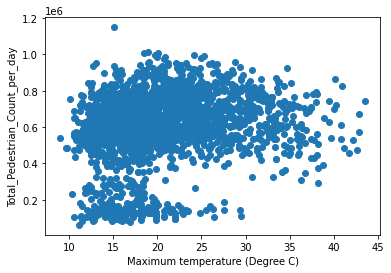

--------------------------------------------------------------------------------------------------------------


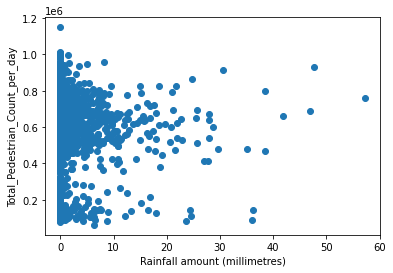

--------------------------------------------------------------------------------------------------------------


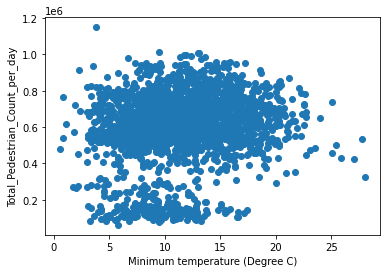

--------------------------------------------------------------------------------------------------------------


In [27]:
# Feature relationship with target
for feature in feat_cols:
  if df[feature].dtypes in ['int','float']:
    plt.clf()
    plt.scatter(df[feature],df[target_col])
    plt.ylabel(target_col)
    plt.xlabel(feature)
    plt.show()
    print('--------------------------------------------------------------------------------------------------------------')

In [29]:
# adding date component
print(df[date_cols])

      day_of_week  monthly_index  year  day_of_year
0     4            1              2015  1          
1     5            1              2015  2          
2     6            1              2015  3          
3     7            1              2015  4          
4     1            1              2015  5          
...  ..           ..               ... ..          
2127  2            10             2020  301        
2128  3            10             2020  302        
2129  4            10             2020  303        
2130  5            10             2020  304        
2131  6            10             2020  305        

[2132 rows x 4 columns]


In [36]:
# get date time format
df['Date'] = df.apply(lambda row:datetime.strptime('{}-{}'.format(row['year'], row['day_of_year']), "%Y-%j").strftime("%m-%d-%Y"), axis=1)

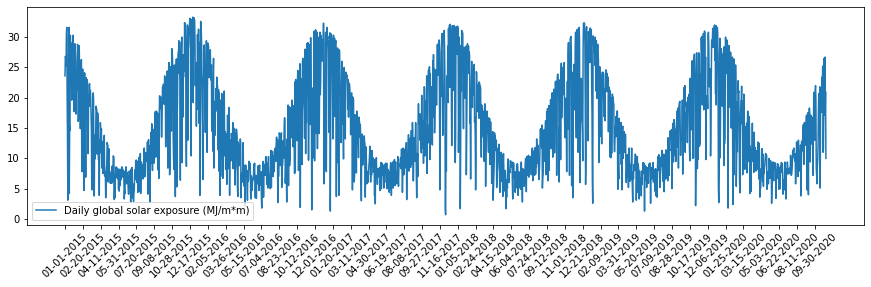

--------------------------------------------------------------------------------------------------------------


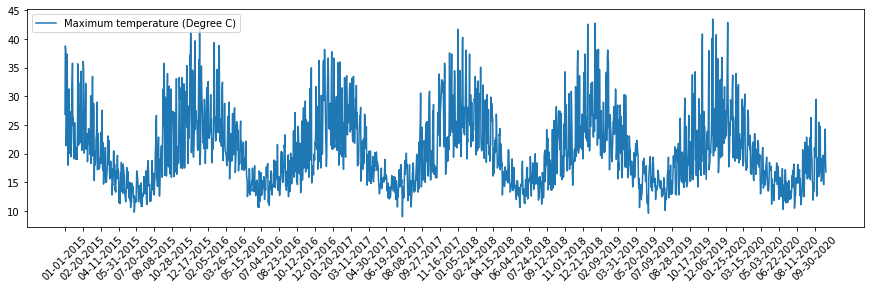

--------------------------------------------------------------------------------------------------------------


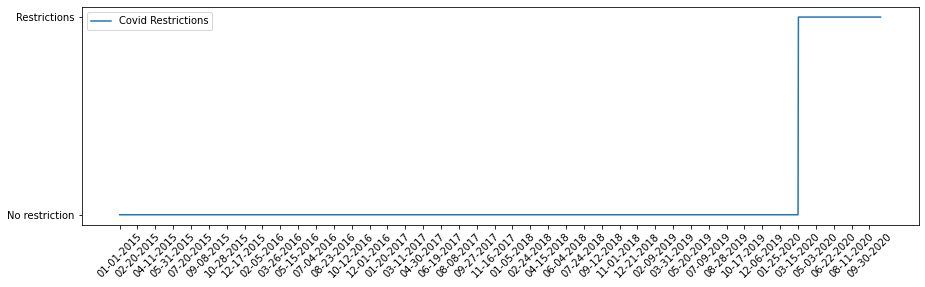

--------------------------------------------------------------------------------------------------------------


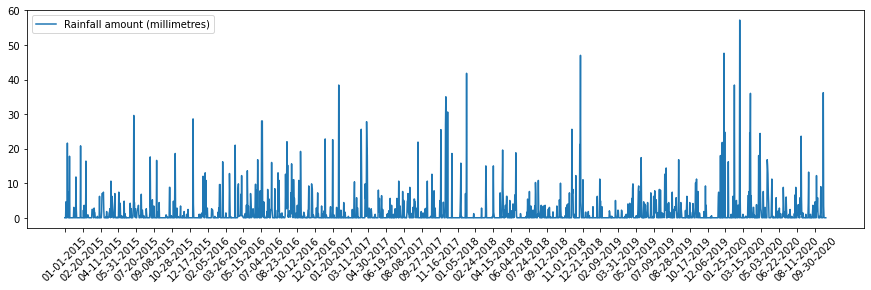

--------------------------------------------------------------------------------------------------------------


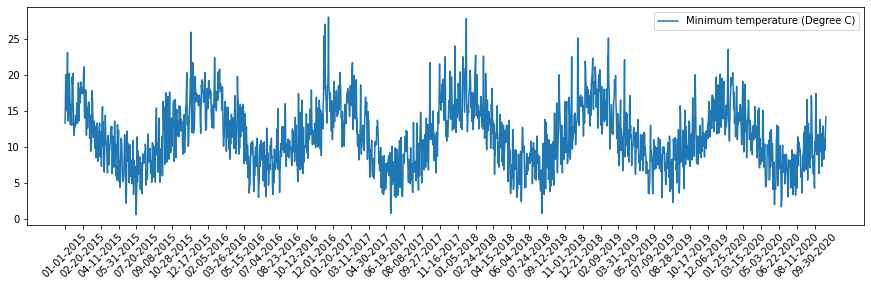

--------------------------------------------------------------------------------------------------------------


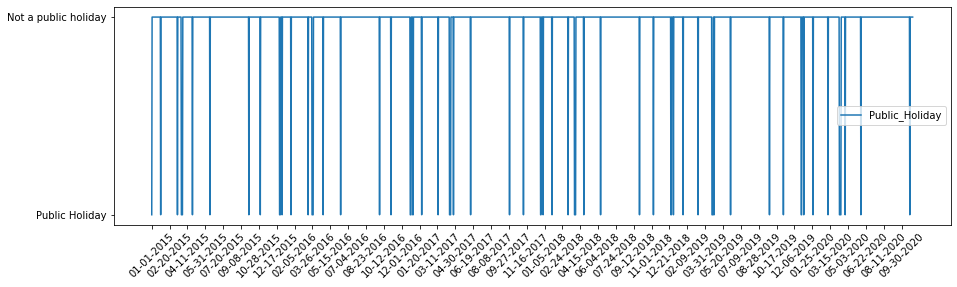

--------------------------------------------------------------------------------------------------------------


In [43]:
num_rows = len(df)
for feature in feat_cols:
  plt.figure(figsize = (15,4))
  plt.plot(range(num_rows), df[feature], label=feature)
  plt.xticks(range(0,num_rows,50),df['Date'].loc[::50],rotation=45)
  plt.legend()
  plt.show()
  print('--------------------------------------------------------------------------------------------------------------')

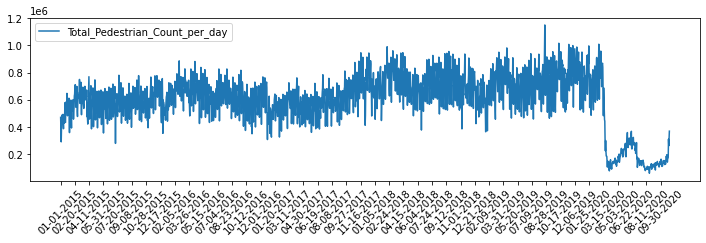

In [44]:
plt.figure(figsize = (12,3))
plt.plot(range(len(df)), df[[target_col]], label=target_col)
plt.legend()
plt.xticks(range(0,num_rows,50),df['Date'].loc[::50],rotation=45)
plt.show()